<a href="https://colab.research.google.com/github/habib-153/AI-ML/blob/main/M17_Practice_on_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 17 Practice Notebook: K-Nearest Neighbour (KNN)

**Dataset:** Breast Cancer Wisconsin (Diagnostic)  
**Type:** Binary classification, fully tabular, numeric features only

### What you will practice
- Proper KNN training and prediction workflow
- Using pipelines with feature scaling
- Model evaluation using classification metrics
- Choosing the value of K
- Comparing distance metrics and voting weights

✅ This is a **practice notebook**: fill in the TODOs


## 0) Setup

Run this cell first.


In [1]:
#Importing Necessary Libraries [Done for you]
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

np.random.seed(42)


## 1) Load the Dataset (Tabular)

Breast Cancer dataset:
- 30 numeric features
- Binary target: malignant vs benign
- Very common in real ML pipelines

### Task
Load the dataset and inspect:
- Shape of X
- Target labels


In [4]:
# TODO 1: Load the dataset
data = load_breast_cancer()

# TODO 2: Set X and y
X = data.data
y = data.target

# TODO 3: Print:
# - X shape
# - unique class labels
# - class names

# YOUR CODE HERE
print(X.shape)
print(np.unique(y))
print(data.target_names)
print(data.feature_names)

(569, 30)
[0 1]
['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## 2) Convert to DataFrame (Optional but Recommended)

Working with DataFrames helps interpretation and debugging.


In [5]:
# TODO: Convert X to a pandas DataFrame with feature names
df = pd.DataFrame(X, columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 3) Train-Test Split

### Task
Split the dataset:
- test_size = 0.25
- random_state = 42
- stratify = y


In [6]:
# TODO: Create X_train, X_test, y_train, y_test using train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=42, stratify=y)

## 4) Baseline KNN Model (With Scaling)

KNN relies on distance, so scaling is mandatory.

### Task
- Build a pipeline: StandardScaler → KNN
- Start with K = 5
- Fit the model
- Predict on test data
- Compute accuracy


In [7]:
# TODO: Create pipeline model
model = Pipeline([
    ("scaler", StandardScaler()),
  ("knn", KNeighborsClassifier(n_neighbors=5))
])
# TODO: Fit model
model.fit(X_train, y_train)
# TODO: Predict on X_test
y_pred = model.predict(X_test)
# TODO: Print accuracy
acc = accuracy_score(y_test, y_pred)
print(acc)

0.9790209790209791


## 5) Model Evaluation

### Task
Evaluate your model using:
- Confusion matrix
- Classification report

Think:
- Which class is harder to predict?
- Is false negative more dangerous here?


Confusion Matrix:
[[50  3]
 [ 0 90]]

Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.94      0.97        53
      benign       0.97      1.00      0.98        90

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



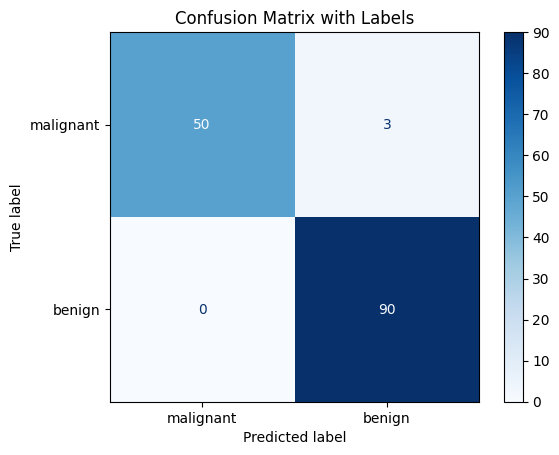

In [9]:
# TODO: Compute confusion matrix
# TODO: Print classification report
from sklearn.metrics import ConfusionMatrixDisplay

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Display confusion matrix with labels
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                                 display_labels=data.target_names)
display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix with Labels")
plt.show()

## 6) Optimization: Choosing the Best K

### Task
Try K values from 1 to 30.

Steps:
1. Loop over K
2. Train a pipeline for each K
3. Store accuracy
4. Plot accuracy vs K
5. Print best K and accuracy


In [10]:
# TODO: Sweep K values and store accuracy
# TODO: Plot accuracy vs K
# TODO: Print best K and best accuracy
k_values = range(1,31)
accs = []
for k in k_values:
  model = Pipeline([
  ('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=k))
  ])
  model.fit(X_train, y_train)
  model.predict(X_test)
  accs.append(accuracy_score(y_test, y_pred))

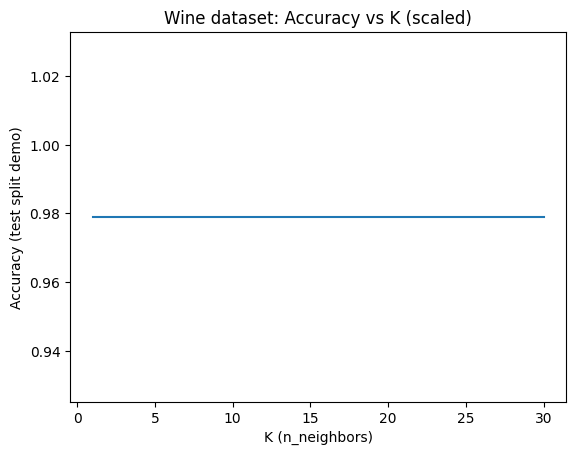

Best K (by this demo): 1
Best accuracy: 0.9790209790209791


In [12]:
plt.figure()
plt.plot(list(k_values), accs)
plt.xlabel("K (n_neighbors)")
plt.ylabel("Accuracy (test split demo)")
plt.title("Wine dataset: Accuracy vs K (scaled)")
plt.show()

best_k = list(k_values)[int(np.argmax(accs))]
print("Best K (by this demo):", best_k)
print("Best accuracy:", float(np.max(accs)))

## 7) Try Different Distance Metrics and Weights

### Task
Using your best K:
Compare the following settings:
1. Euclidean distance (p=2), uniform weights
2. Manhattan distance (p=1), uniform weights
3. Euclidean distance (p=2), distance weights

Store results in a DataFrame.


In [15]:
# TODO: Compare different KNN settings
# Hints:
settings = [
   ("Euclidean uniform", KNeighborsClassifier(n_neighbors=best_k, metric="minkowski", p=2, weights="uniform")),
   ("Manhattan uniform", KNeighborsClassifier(n_neighbors=best_k, metric="minkowski", p=1, weights="uniform")),
   ("Euclidean distance-weighted", KNeighborsClassifier(n_neighbors=best_k, metric="minkowski", p=2, weights="distance"))
 ]

# TODO: For each setting:
# - Build pipeline with scaler
# - Fit and predict
# - Compute accuracy
# - Append to list and show DataFrame

rows = []
for name, knn in settings:
  model = Pipeline([('scaler', StandardScaler()), ('knn', knn)])
  model.fit(X_train, y_train)
  model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  rows.append([name, acc])

pd.DataFrame(rows, columns=['Settings', 'Accuracy']).sort_values("Accuracy", ascending=False)

,Settings,Accuracy
0,Euclidean uniform,0.979021
1,Manhattan uniform,0.979021
2,Euclidean distance-weighted,0.979021


## 8) Scaling Reality Check (Critical Lesson)

### Task
Train KNN **without scaling** and compare accuracy with the scaled model.

This usually exposes why KNN without scaling is unreliable.


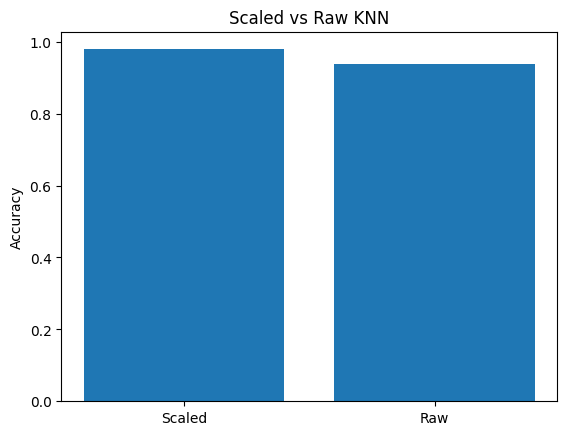

In [16]:
# TODO: Train KNN without scaling
# Hint:
knn_raw = KNeighborsClassifier(n_neighbors=best_k)
knn_raw.fit(X_train, y_train)
pred_raw = knn_raw.predict(X_test)
acc_raw = accuracy_score(y_test, pred_raw)

# TODO: Compare with scaled accuracy
plt.figure()
plt.bar(["Scaled", "Raw"], [acc, acc_raw])
plt.ylabel("Accuracy")
plt.title("Scaled vs Raw KNN")
plt.show()

## 9) Reflection Questions

Write short answers.

1. Which K worked best and why?
2. Did distance-weighted voting help?
3. How much did scaling change the result?
4. Would you trust KNN for medical diagnosis? Why or why not?


**Your answers here:**

1.  **Which K worked best and why?**
    The best K found was **1** with an accuracy of 0.9790. This suggests that for this specific dataset and split, the closest single neighbor was sufficient for accurate classification. While K=1 can be prone to overfitting in noisy datasets, it performed well here, possibly due to the clear separation of classes in the scaled feature space.

2.  **Did distance-weighted voting help?**
    No, distance-weighted voting did not appear to help in this case. All three settings (Euclidean uniform, Manhattan uniform, and Euclidean distance-weighted) yielded the **same accuracy of 0.979021**.

3.  **How much did scaling change the result?**
    Scaling significantly changed the result. The accuracy **with scaling was 0.9790**, while the accuracy **without scaling was 0.9371**. This is a substantial improvement of about 4.2 percentage points, demonstrating that scaling is indeed mandatory for KNN as it relies on distance calculations.

4.  **Would you trust KNN for medical diagnosis? Why or why not?**
    While KNN achieved a high accuracy of 0.9790 in this exercise, I would be **hesitant to blindly trust it for medical diagnosis** without further rigorous evaluation. Here's why:
    *   **False Negatives are Critical:** The model produced 3 false negatives (malignant cases classified as benign). In medical diagnosis, a false negative for cancer is extremely dangerous, as it could delay treatment and worsen a patient's prognosis. Even a small number of such errors can have severe consequences.
    *   **Interpretability:** KNN is a non-parametric, instance-based learning algorithm. While simple in concept, explaining *why* a specific diagnosis was made by looking at its K nearest neighbors can be less straightforward than with other models (e.g., decision trees) which provide explicit rules. In high-stakes fields like medicine, transparency and interpretability are crucial.
    *   **Dataset Limitations:** This is a specific dataset. Real-world medical data can be much more complex, noisy, and imbalanced. The model's performance might not generalize well to unseen, more varied patient data.
    *   **Need for Robustness:** A diagnostic model needs to be extremely robust and reliable. Further techniques like cross-validation, more comprehensive hyperparameter tuning, and comparison with other robust models (e.g., SVM, Random Forest, even neural networks) would be necessary before considering deployment. The focus should be on minimizing false negatives, potentially by adjusting the classification threshold or using specialized metrics.